In [13]:
from sympy import *
init_printing()
j = I
t,f = symbols('t f',real=True)
s = symbols('s')

In [11]:
#sys A
OS = 0.52
tp = 0.175
zeta = abs(log(OS))/sqrt(pi**2 + log(OS)**2)
wn = pi/(tp*sqrt(1-zeta**2))
G = (wn**2/(s**2 + 2*zeta*wn*s + wn**2)).evalf()
G


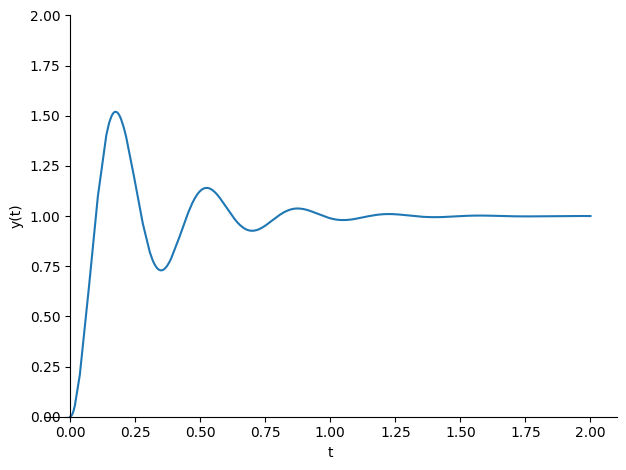

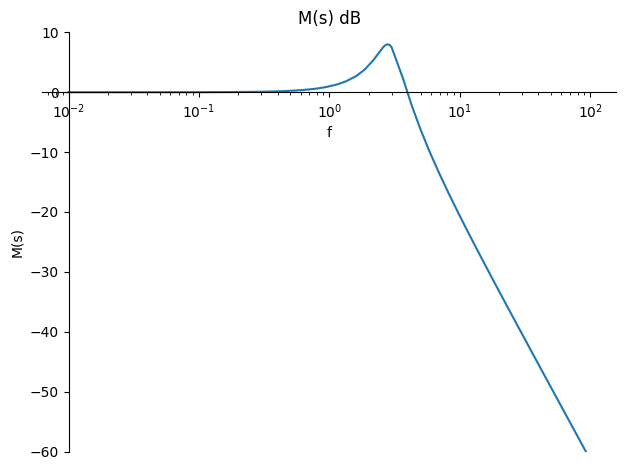

In [15]:
y = inverse_laplace_transform(G/s, s, t)
plot(y,(t,0,2),ylim=(0,2),ylabel='y(t)',xlabel='t');
#plot G gain in db
M = (20*log(abs(G),10)).subs(s,j*2*pi*f).simplify()
plot(M,(f,1e-2,1e2),ylim=(-60,10),ylabel='M(s)',xlabel='f',xscale='log',yscale='linear',title='M(s) dB',axis_center=(1e-2,0));

In [21]:
OS = 0.11
tp = 0.6
zeta = abs(log(OS))/sqrt(pi**2 + log(OS)**2)
wn = pi/(tp*sqrt(1-zeta**2))
G = (wn**2/(s**2 + 2*zeta*wn*s + wn**2)).evalf()
G


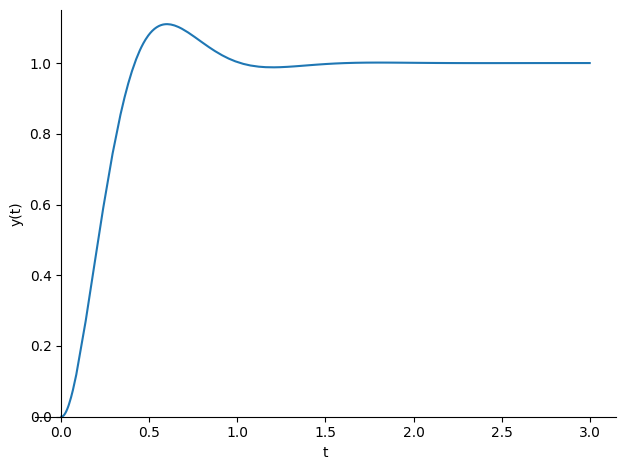

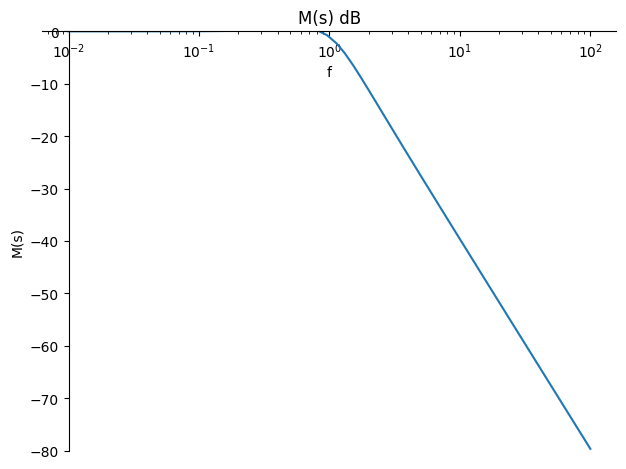

In [22]:
y = inverse_laplace_transform(G/s, s, t)
plot(y,(t,0,3),ylim=(0,1.15),ylabel='y(t)',xlabel='t');
#plot G gain in db
M = (20*log(abs(G),10)).subs(s,j*2*pi*f).simplify()
plot(M,(f,1e-2,1e2),ylim=(-80,0),ylabel='M(s)',xlabel='f',xscale='log',yscale='linear',title='M(s) dB',axis_center=(1e-2,0));

In [27]:
p1,p2 = -1+2*j,-1-2*j
den = cancel((s-p1)*(s-p2))
den

In [31]:
a0,a1 = den.subs(s,0),den.coeff(s)
wn = sqrt(a0)
zeta = a1/2/wn
display((a1,a0),((zeta,wn),((zeta.evalf(),wn.evalf()))))

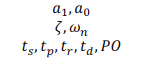

In [39]:
ts = 4/zeta/wn
tp = pi/wn/sqrt(1-zeta**2)
tr = (1-0.4167*zeta+2.917*zeta**2)/wn
td = (1.1+0.125*zeta+0.469*zeta**2)/wn
PO = 100*exp(-zeta*pi/sqrt(1-zeta**2))
display(tuple([k.evalf() for k in (ts,tp,tr,td,PO)]))